<a href="https://colab.research.google.com/github/XimeAOSM/Internet-COVID-DS4A/blob/main/FINAL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from scipy import stats

import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
worksheet = gc.open('joined_using_CopyCovidDeaths').sheet1

wbJoined = worksheet.get_all_values()

df_joined = pd.DataFrame.from_records(wbJoined[1:], columns=wbJoined[0])
df_joined

,date_as_of,start_date,end_date,state,county_name,fips,urban_rural_code,deaths_involving_covid_19,non_covid_deaths,deaths_from_all_causes,census_id,county_state_combo,county,Right_state,region,division,total_households,one_or_more_computing_device,laptop_desktop,laptop_desktop_only,smartphone,smartphone_only,tablet_or_other_device,tablet_or_other_device_only,other_computer,other_computer_only,no_computer,internet_subscription,dialup,broadband_any,broadband_cellular_data,broadband_cellular_data_only,broadband_cfd,broadband_satellite,no_internet,income_low,income_low_dialup,income_low_broadband,income_low_no_internet,income_medium,income_medium_dialup,income_medium_broadband,income_medium_no_internet,income_high,income_high_dialup,income_high_broadband,income_high_no_internet
0,6/9/2021,,6/5/2021,UT,Tooele County,49045,Large fringe metro,0.05094339623,0.9490566038,530,0500000US49045,"Tooele County, UT",Tooele County,UT,West,8,143903,0.1925602663,0.186841136,0.007852511761,0.1811984462,0.001799823492,0.1454938396,0.001195249578,0.004343203408,0,2.45E-03,0.183901656,0.0005281335344,0.1833735224,0.1722479726,0.01035419692,0.1693640855,0.01242503631,0.01110470247,0.1147432646,0.0004183373522,0.08357782673,0.03074710048,0.4477599494,0.001797043842,0.3999054919,0.04605671876,0.6289806328,0.0005086759831,0.6110796856,0.01739227118
1,6/9/2021,1/1/2020,6/5/2021,CO,Broomfield County,8014,Large fringe metro,0.106029106,0.893970894,481,0500000US08014,"Broomfield County, CO",Broomfield County,CO,West,8,171458,0.233299117,0.1998565246,0.00490499131,0.2241598526,0.01370598047,0.1801490744,0.00008165264963,0.004595877708,0,7.95E-03,0.2240140443,0,0.2240140443,0.2195523102,0.0148374529,0.191889559,0.02934829521,0.0172345414,0.1406962638,0.0003406081956,0.08923059875,0.05112505687,0.4214192397,0.0009302569726,0.3509098438,0.06957972215,0.524821239,0.0003452740613,0.5029814882,0.02149447678
2,6/9/2021,1/1/2020,6/5/2021,IL,Kendall County,17093,Large fringe metro,0.02811950791,0.9718804921,569,0500000US17093,"Kendall County, IL",Kendall County,IL,Midwest,3,186364,0.1421197227,0.125136829,0.003010238029,0.1344304694,0.007753643408,0.1114592947,0.001293168208,0.005446330836,0,1.34E-02,0.1365714408,0.00037024318,0.1362011977,0.1204953746,0.01296387714,0.1179948917,0.01006632182,0.01895752399,0.05873730978,0.0001285656028,0.03845163229,0.02015711189,0.1871709128,0.0005086819343,0.1568875963,0.02977463459,0.1531564036,0.000159902127,0.1461114808,0.006885020712
3,6/9/2021,1/1/2020,6/5/2021,TX,Rockwall County,48397,Large fringe metro,0.1914590747,0.8085409253,1405,0500000US48397,"Rockwall County, TX",Rockwall County,TX,South,7,164410,0.2215011252,0.2061918375,0.00172130649,0.2147618758,0.007523873244,0.1802688401,0.000967094459,0.003485189465,0,1.51E-03,0.2171644061,0,0.2171644061,0.2074934615,0.01599051153,0.1864485129,0.02481600876,0.005845143239,0.130148857,0.0001665188157,0.08448597786,0.04549636034,0.4282626384,0.0005423624556,0.3657659808,0.06195429512,0.4415875865,0.0002499503657,0.4232293174,0.01810831871
4,6/9/2021,1/1/2020,6/5/2021,IN,Hancock County,18059,Large fringe metro,0.1164948454,0.8835051546,970,0500000US18059,"Hancock County, IN",Hancock County,IN,Midwest,3,74371,0.2813596698,0.2243616463,0.008417259416,0.2683572898,0.03010582082,0.1964744322,0.00258165145,0.002232052816,0,4.93E-03,0.2781863899,0.0007933199769,0.2773930699,0.2590391416,0.05792580441,0.2015839507,0.02314074034,0.008107999086,0.1686566897,0.0006857511664,0.1219045954,0.04606634306,0.7616880236,0.002447190437,0.6772397843,0.0820010488,1.004582879,0.0007686687912,0.9695087242,0.03430548645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,6/9/2021,1/1/2020,6/5/2021,GA,Dougherty County,13095,Small metro,0.1809269162,0.8190730838,2244,0500000US13095,"Dougherty County, GA",Dougherty County,GA,South,5,32630,0.8400245173,0.6073551946,0.

In [ ]:
df_census_interwebs=df_joined

In [ ]:
df_census_interwebs['total_households'] = df_census_interwebs['total_households'].astype(int)
df_census_interwebs['one_or_more_computing_device'] = pd.to_numeric(df_census_interwebs['one_or_more_computing_device'])
df_census_interwebs['laptop_desktop'] = pd.to_numeric(df_census_interwebs['laptop_desktop'])
df_census_interwebs['laptop_desktop_only'] = pd.to_numeric(df_census_interwebs['laptop_desktop_only'])
df_census_interwebs['smartphone'] = pd.to_numeric(df_census_interwebs['smartphone'])
df_census_interwebs['smartphone_only'] = pd.to_numeric(df_census_interwebs['smartphone_only'])
df_census_interwebs['tablet_or_other_device'] = pd.to_numeric(df_census_interwebs['tablet_or_other_device'])
df_census_interwebs['tablet_or_other_device_only'] = pd.to_numeric(df_census_interwebs['tablet_or_other_device_only'])
df_census_interwebs['other_computer'] = pd.to_numeric(df_census_interwebs['other_computer'])
df_census_interwebs['other_computer_only'] = pd.to_numeric(df_census_interwebs['other_computer_only'])
df_census_interwebs['no_computer'] = pd.to_numeric(df_census_interwebs['no_computer'])
df_census_interwebs['internet_subscription'] = pd.to_numeric(df_census_interwebs['internet_subscription'])
df_census_interwebs['dialup'] = pd.to_numeric(df_census_interwebs['dialup'])
df_census_interwebs['broadband_any'] = pd.to_numeric(df_census_interwebs['broadband_any'])
df_census_interwebs['broadband_cellular_data'] = pd.to_numeric(df_census_interwebs['broadband_cellular_data'])
df_census_interwebs['broadband_cellular_data_only'] = pd.to_numeric(df_census_interwebs['broadband_cellular_data_only'])
df_census_interwebs['broadband_cfd'] = pd.to_numeric(df_census_interwebs['broadband_cfd'])
df_census_interwebs['broadband_satellite'] = pd.to_numeric(df_census_interwebs['broadband_satellite'])
df_census_interwebs['no_internet'] = pd.to_numeric(df_census_interwebs['no_internet'])

df_census_interwebs['income_high']=pd.to_numeric(df_census_interwebs['income_high'])
df_census_interwebs['income_high_dialup']=pd.to_numeric(df_census_interwebs['income_high_dialup'])
df_census_interwebs['income_high_broadband']=pd.to_numeric(df_census_interwebs['income_high_broadband'])
df_census_interwebs['income_high_no_internet']=pd.to_numeric(df_census_interwebs['income_high_no_internet'])
df_census_interwebs['income_low']=pd.to_numeric(df_census_interwebs['income_low'], errors='ignore')
df_census_interwebs['income_low_dialup']=pd.to_numeric(df_census_interwebs['income_low_dialup'])
df_census_interwebs['income_low_broadband']=pd.to_numeric(df_census_interwebs['income_low_broadband'])
df_census_interwebs['income_low_no_internet']=pd.to_numeric(df_census_interwebs['income_low_no_internet'])
df_census_interwebs['income_medium']=pd.to_numeric(df_census_interwebs['income_medium'])
df_census_interwebs['income_medium_dialup']=pd.to_numeric(df_census_interwebs['income_medium_dialup'])
df_census_interwebs['income_medium_broadband']=pd.to_numeric(df_census_interwebs['income_medium_broadband'])
df_census_interwebs['income_medium_no_internet']=pd.to_numeric(df_census_interwebs['income_medium_no_internet'])

df_census_interwebs['deaths_involving_covid_19']=pd.to_numeric(df_census_interwebs['deaths_involving_covid_19'])
df_census_interwebs['deaths_from_all_causes']=pd.to_numeric(df_census_interwebs['deaths_from_all_causes'])
df_census_interwebs['non_covid_deaths']=pd.to_numeric(df_census_interwebs['non_covid_deaths'])

In [ ]:
df_census_interwebs.dtypes

date_as_of                       object
start_date                       object
end_date                         object
state                            object
county_name                      object
fips                             object
urban_rural_code                 object
deaths_involving_covid_19       float64
non_covid_deaths                float64
deaths_from_all_causes            int64
census_id                        object
county_state_combo               object
county                           object
Right_state                      object
region                           object
division                         object
total_households                  int64
one_or_more_computing_device    float64
laptop_desktop                  float64
laptop_desktop_only             float64
smartphone                      float64
smartphone_only                 float64
tablet_or_other_device          float64
tablet_or_other_device_only     float64
other_computer                  float64


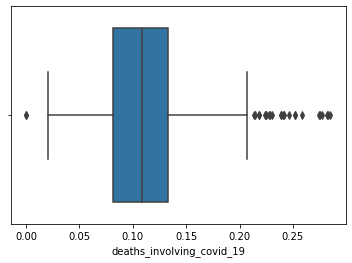

In [ ]:
#boxplot of covid-19 deaths
sns.boxplot(x=df_census_interwebs['deaths_involving_covid_19'])
plt.show()

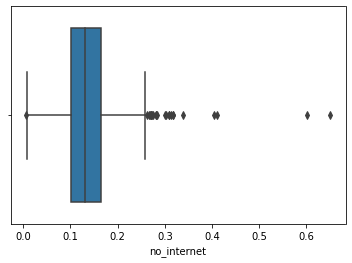

In [ ]:
#boxplot of no internet
sns.boxplot(x=df_census_interwebs['no_internet'])
plt.show()

[Text(0, 0.5, 'deaths_involving_covid_19'),
 Text(0, 1.5, 'non_covid_deaths'),
 Text(0, 2.5, 'deaths_from_all_causes'),
 Text(0, 3.5, 'total_households'),
 Text(0, 4.5, 'one_or_more_computing_device'),
 Text(0, 5.5, 'laptop_desktop'),
 Text(0, 6.5, 'laptop_desktop_only'),
 Text(0, 7.5, 'smartphone'),
 Text(0, 8.5, 'smartphone_only'),
 Text(0, 9.5, 'tablet_or_other_device'),
 Text(0, 10.5, 'tablet_or_other_device_only'),
 Text(0, 11.5, 'other_computer'),
 Text(0, 12.5, 'other_computer_only'),
 Text(0, 13.5, 'no_computer'),
 Text(0, 14.5, 'internet_subscription'),
 Text(0, 15.5, 'dialup'),
 Text(0, 16.5, 'broadband_any'),
 Text(0, 17.5, 'broadband_cellular_data'),
 Text(0, 18.5, 'broadband_cellular_data_only'),
 Text(0, 19.5, 'broadband_cfd'),
 Text(0, 20.5, 'broadband_satellite'),
 Text(0, 21.5, 'no_internet'),
 Text(0, 22.5, 'income_low'),
 Text(0, 23.5, 'income_low_dialup'),
 Text(0, 24.5, 'income_low_broadband'),
 Text(0, 25.5, 'income_low_no_internet'),
 Text(0, 26.5, 'income_medium

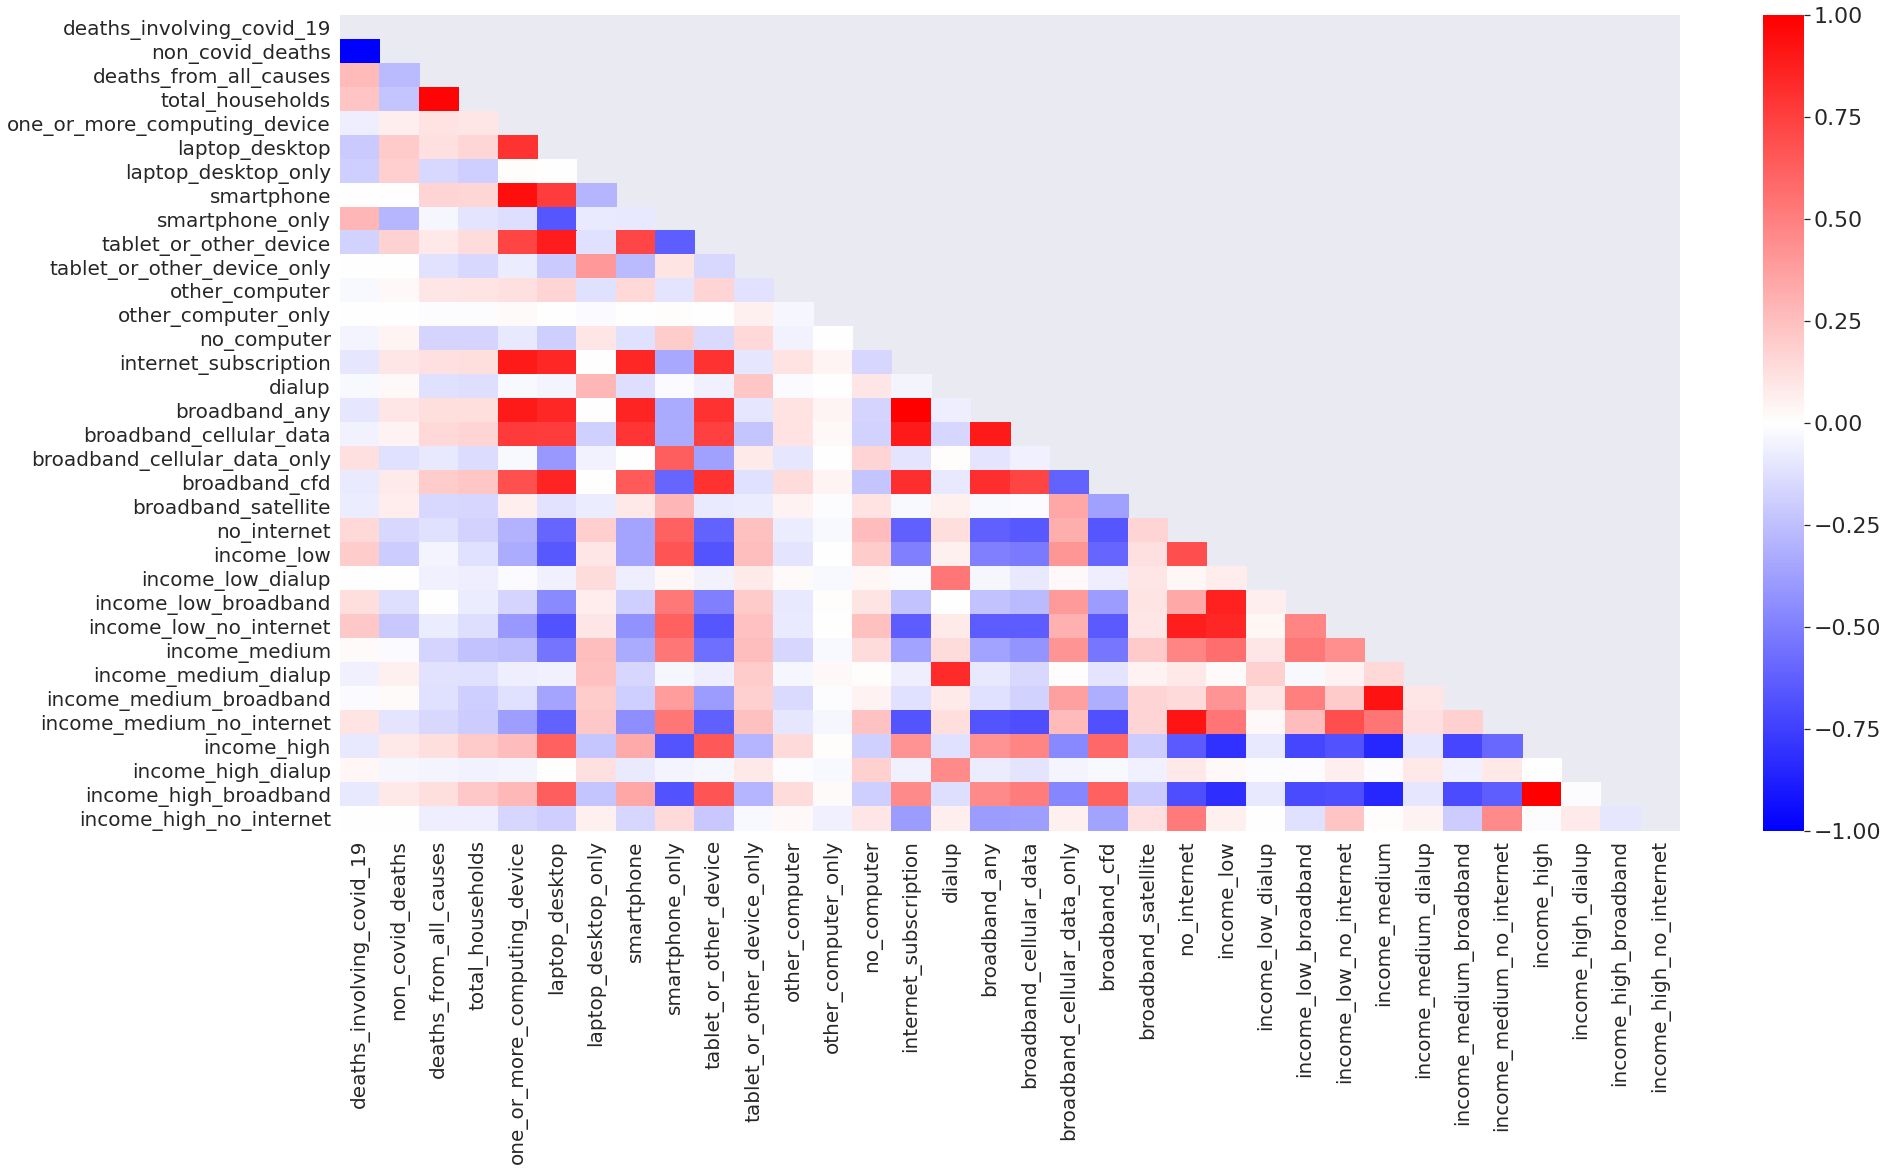

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
mask = np.triu(np.ones_like(df_census_interwebs.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_census_interwebs.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cbar=True, cmap='bwr')
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

In [ ]:
#correlation of only the variables we looked at previously
df_new = df_census_interwebs.filter(["no_internet", "deaths_involving_covid_19", "internet_subscription", "income_low_no_internet", "income_medium_no_internet", "income_high_no_internet"], axis=1)
df_new.corr()

,no_internet,deaths_involving_covid_19,internet_subscription,income_low_no_internet,income_medium_no_internet,income_high_no_internet
no_internet,1.000000,0.154495,-0.617849,0.877222,0.918178,0.516697
deaths_involving_covid_19,0.154495,1.000000,-0.097194,0.211157,0.102900,0.006826
internet_subscription,-0.617849,-0.097194,1.000000,-0.635074,-0.665794,-0.388166
income_low_no_internet,0.877222,0.211157,-0.635074,1.000000,0.694327,0.233127
income_medium_no_internet,0.918178,0.102900,-0.665794,0.694327,1.000000,0.460483
income_high_no_internet,0.516697,0.006826,-0.388166,0.233127,0.460483,1.000000


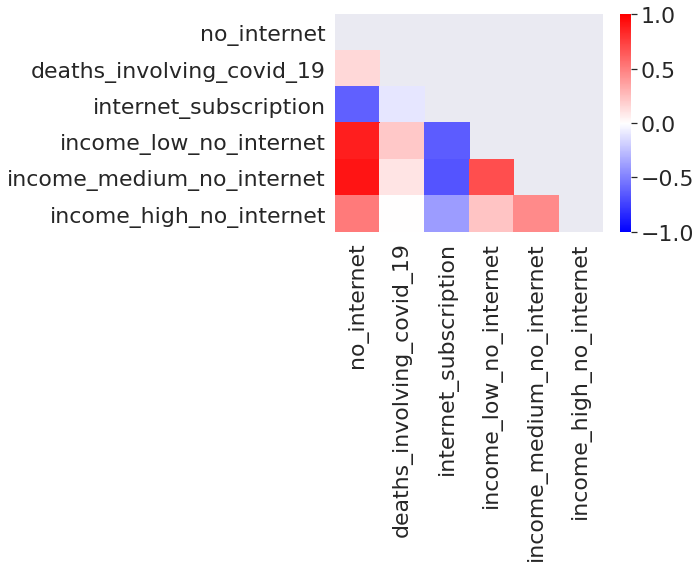

In [ ]:
#plotting the above
mask = np.triu(np.ones_like(df_new.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_new.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='bwr')

In [ ]:
#correlation of only deaths involving covid-19 with all variables
df_census_interwebs.corr() [['deaths_involving_covid_19']].sort_values(by='deaths_involving_covid_19', ascending=False)

,deaths_involving_covid_19
deaths_involving_covid_19,1.000000
smartphone_only,0.287446
deaths_from_all_causes,0.272309
total_households,0.227183
income_low_no_internet,0.211157
income_low,0.196574
no_internet,0.154495
income_low_broadband,0.131239
broadband_cellular_data_only,0.123562
income_medium_no_internet,0.102900


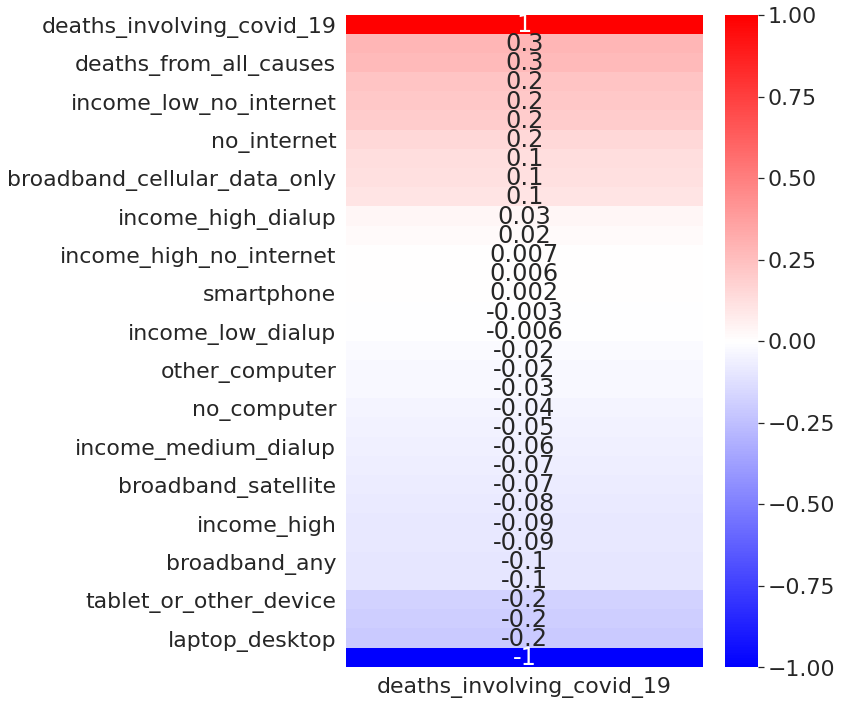

In [ ]:
#plotting the above
plt.figure(figsize=(8,12))
heatmap2 = sns.heatmap(df_census_interwebs.corr() [['deaths_involving_covid_19']].sort_values(by='deaths_involving_covid_19', ascending=False), 
                       vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='bwr')


In [ ]:
#grouping dataset by the mean % covid deaths, per county descriptor
grouped_by_county_desc_covid = df_census_interwebs.groupby('urban_rural_code')['deaths_involving_covid_19'].mean()
grouped_by_county_desc_covid.head()

urban_rural_code
Large central metro    0.135934
Large fringe metro     0.108857
Medium metro           0.107151
Micropolitan           0.095201
Noncore                0.088317
Name: deaths_involving_covid_19, dtype: float64

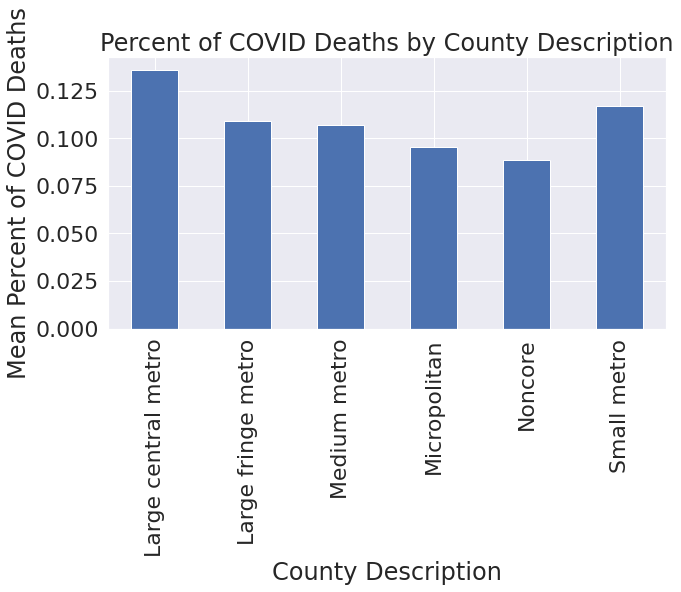

In [ ]:
#plotting the above
grouped_by_county_desc_covid.plot(kind='bar', title='Percent of COVID Deaths by County Description', ylabel='Mean Percent of COVID Deaths', xlabel='County Description', figsize=(10,5))

In [ ]:
#grouping dataset by the mean % no internet, per county descriptor
grouped_by_county_desc_internet = df_census_interwebs.groupby('urban_rural_code')['no_internet'].mean()
grouped_by_county_desc_internet.head()

urban_rural_code
Large central metro    0.123760
Large fringe metro     0.104492
Medium metro           0.136448
Micropolitan           0.179466
Noncore                0.318383
Name: no_internet, dtype: float64

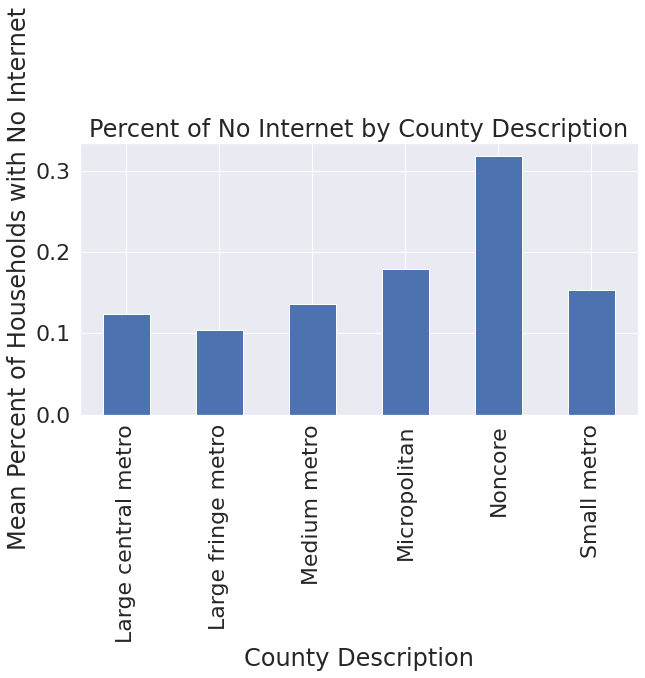

In [ ]:
#plotting the above
grouped_by_county_desc_internet.plot(kind='bar', title='Percent of No Internet by County Description', ylabel='Mean Percent of Households with No Internet', xlabel='County Description', figsize=(10,5))

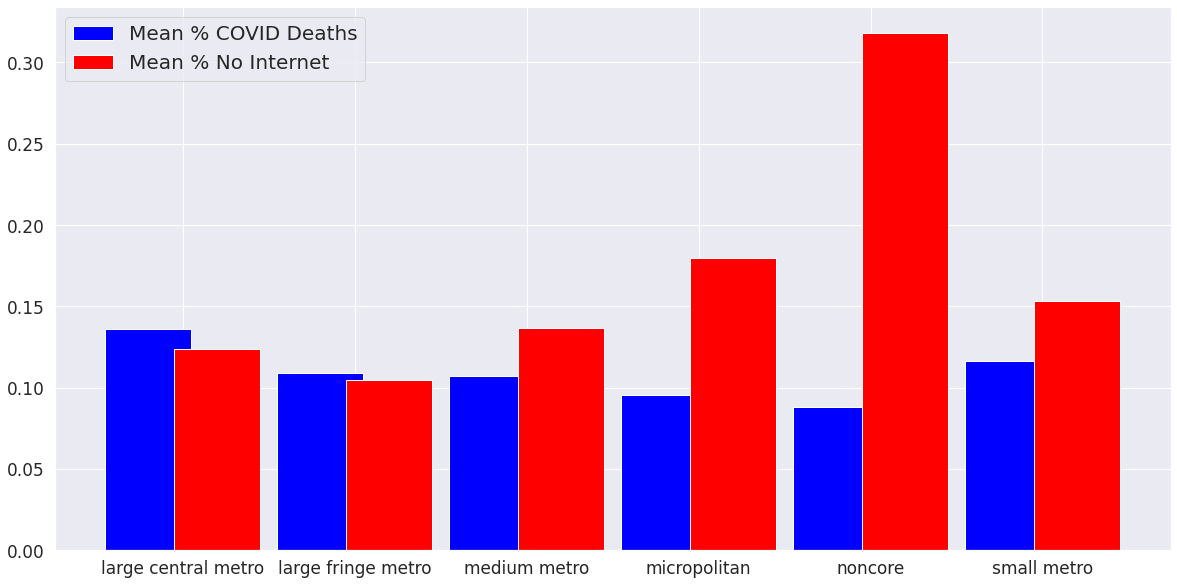

In [ ]:
#plot means of covid deaths and no internet country-wide
x = np.arange(6)
width = 0.5

fig = plt.figure(figsize=(20,10))
order = ['large central metro', 'large fringe metro', 'medium metro', 'micropolitan', 'noncore', 'small metro']
plt.bar(x-0.2, grouped_by_county_desc_covid, width, color='blue')
plt.bar(x+0.2, grouped_by_county_desc_internet, width, color='red')
plt.xticks(x, ['large central metro', 'large fringe metro', 'medium metro', 'micropolitan', 'noncore', 'small metro'])
plt.legend(['Mean % COVID Deaths', 'Mean % No Internet'], prop={'size':20})
plt.tick_params(labelsize=17)
plt.show()